In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns

In [20]:
import warnings
warnings.simplefilter("ignore")

# 1.    Reading Resturant.csv dataset

In [6]:
df = pd.read_csv('zomato.csv', encoding='latin-1')

In [7]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177


# 2.    Finding the Missing values in each column

In [8]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

# 3.    Selecting the city which has maximum number of restaurants

In [17]:
df.groupby('City').count()['Restaurant Name'].sort_values(ascending=False).head(1)

City
New Delhi    5473
Name: Restaurant Name, dtype: int64

# 4.    Locating the best locality where maximum Restaurants are listed

In [10]:
df[df['City']=='New Delhi'].groupby('Locality').count()['Restaurant Name'].sort_values(ascending=False).head(1)

Locality
Connaught Place    122
Name: Restaurant Name, dtype: int64

# 5.    Most frequent Cuisine offered by highly rates restaurant.

In [11]:
df[(df['Locality']=='Connaught Place') & (df['Aggregate rating']>=3.5)]['Cuisines'].value_counts().sort_values(ascending=False).head()

North Indian, Mughlai        7
Cafe                         4
North Indian                 4
Fast Food, Burger            3
North Indian, Continental    2
Name: Cuisines, dtype: int64

# 6.    Comparing the online delivery status. Also getting the localities from where online delivery is maximum.

In [12]:
pd.set_option('display.max_rows', 500)
pd.crosstab(df[df['City']=='New Delhi']['Locality'],df[df['City']=='New Delhi']['Has Online delivery']).sort_values(ascending=False, by='Yes')

Has Online delivery,No,Yes
Locality,,
Malviya Nagar,20,64
Connaught Place,70,52
Defence Colony,37,49
Rajouri Garden,54,45
Pitampura,44,41
Greater Kailash (GK) 1,25,41
Rajinder Nagar,43,38
Greater Kailash (GK) 2,29,37
Punjabi Bagh,24,36


In [14]:
pd.crosstab(df[df['City']=='New Delhi']['Locality'],df[df['City']=='New Delhi']['Has Online delivery']).sort_values(ascending=False, by='Yes').head(3)

Has Online delivery,No,Yes
Locality,,
Malviya Nagar,20,64
Connaught Place,70,52
Defence Colony,37,49


# 7.    The relation between Rating and cost of dining

In [15]:
pd.crosstab(df[df['City']=='New Delhi']['Rating text'], df[df['City']=='New Delhi']['Price range'])

Price range,1,2,3,4
Rating text,,,,
Average,1386,879,173,57
Excellent,5,5,11,7
Good,387,419,221,101
Not rated,1179,218,22,6
Poor,38,49,10,0
Very Good,57,86,112,45


## 8.    Getting the rating of the restaurants having common eateries

In [18]:
df1 = df[df['City']=='New Delhi']

ccd1 = df1.groupby('Restaurant Name').mean()['Aggregate rating']['Cafe Coffee Day']
ccd2 = df1.groupby('Restaurant Name').mean()['Aggregate rating']['Cafe Coffee Day - The Lounge']
ccd3 = df1.groupby('Restaurant Name').mean()['Aggregate rating']['Cafe Coffee Day The Square']
ccd = round((ccd1+ccd2+ccd3)/3, 1)

cstc = round(df1.groupby('Restaurant Name').mean()['Aggregate rating']['Costa Coffee'],1)

chys = round(df1.groupby('Restaurant Name').mean()['Aggregate rating']['Chaayos'],1)

dmn = round(df1.groupby('Restaurant Name').mean()['Aggregate rating']["Domino's Pizza"],1)
mcd = round(df1.groupby('Restaurant Name').mean()['Aggregate rating']["McDonald's"],1)
brgk = round(df1.groupby('Restaurant Name').mean()['Aggregate rating']["Burger King"],1)
sbw = round(df1.groupby('Restaurant Name').mean()['Aggregate rating']["Subway"],1)
pzh = round(df1.groupby('Restaurant Name').mean()['Aggregate rating']["Pizza Hut"],1)

print('RATING\n')
print('Cuisine: COFFEE')
print('Cafe Coffee Day\t', ccd)
print('Costa Coffee\t', cstc)
print('Chaayos \t', chys)

print('\n')

print('Cuisine: AMERICAN')
print("Domino's Pizza\t", dmn)
print("McDonald's\t", mcd)
print('Burger King\t', brgk)
print('Subway  \t', sbw)
print('Pizza Hut\t', pzh)

RATING

Cuisine: COFFEE
Cafe Coffee Day	 3.0
Costa Coffee	 3.4
Chaayos 	 3.8


Cuisine: AMERICAN
Domino's Pizza	 2.8
McDonald's	 3.4
Burger King	 3.5
Subway  	 3.0
Pizza Hut	 3.2


# 9.    Heatmap for understanding the correlation for each variable

<AxesSubplot:>

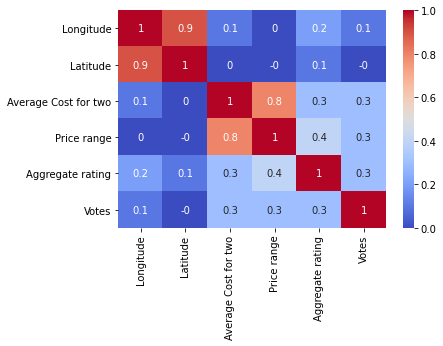

In [19]:
df2 = df.copy()
df2.drop(['Restaurant ID','Country Code'], axis=1, inplace=True)
df2cr = round(df2.corr(),1)
sns.heatmap(df2cr, annot=True, cmap='coolwarm')

# 10.  Boxplots to explore the outliers from the relevant columns

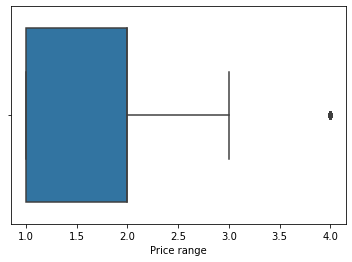

In [23]:
sns.boxplot(df2['Price range']);

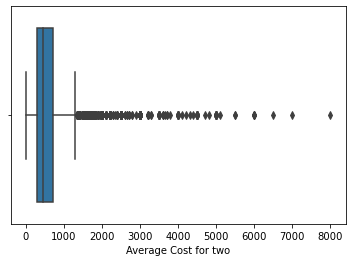

In [21]:
sns.boxplot(df2['Average Cost for two']);